### Dataset

**HDI (Human Development Index)** <br>
Link: https://www.kaggle.com/sudhirnl7/human-development-index-hdi

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
df_hdi = pd.read_csv('datasets/HDI.csv', index_col=0)

In [3]:
df_hdi.tail(14)

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
181,182,South Sudan,181.0,0.418,56.1,4.8,1882.0,-12.0,-7.0,NaN,...,NaN,40.7,0.330,39.6,0.180,NaN,NaN,13.1,2.7,46.3
182,183,Guinea,183.0,0.414,59.2,2.6,1058.0,4.0,0.0,1.74,...,33.6,35.4,0.390,48.3,0.171,17.1,0.296,5.5,1.3,33.7
183,184,Burundi,184.0,0.404,57.1,3.0,691.0,5.0,-1.0,-0.06,...,30.6,40.8,0.338,36.9,0.249,14.1,0.251,4.8,1.3,33.4
184,185,Burkina Faso,185.0,0.402,59.0,1.4,1537.0,-8.0,0.0,NaN,...,33.3,37.1,0.377,38.6,0.161,24.2,0.313,5.3,1.5,35.3
185,186,Chad,186.0,0.396,51.9,2.3,1991.0,-19.0,0.0,NaN,...,39.6,46.2,0.264,41.9,0.163,30.7,0.313,10.0,2.2,43.3
186,187,Niger,187.0,0.353,61.9,1.7,889.0,1.0,1.0,1.85,...,27.5,35.3,0.417,35.0,0.134,12.3,0.290,5.4,1.4,34.0
187,188,Central African Republic,188.0,0.352,51.5,4.2,587.0,4.0,-1.0,-0.19,...,43.1,45.7,0.263,34.5,0.221,49.2,0.136,18.3,4.5,56.2
188,189,Korea (Democratic People's Rep. of),NaN,NaN,70.5,NaN,NaN,NaN,NaN,NaN,...,NaN,15.4,0.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,190,Marshall Islands,NaN,NaN,NaN,NaN,4412.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,191,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_hdi = df_hdi.fillna(0)

In [5]:
df_hdi = df_hdi[df_hdi['HDI'] != 0]

In [6]:
df_hdi.shape

(188, 81)

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. 
HDI is broken down into four tiers:

- very high human development (0.8-1.0)
- high human development (0.7-0.79)
- medium human development (0.55-.70)
- and low human development (below 0.55)

In [7]:
df_hdi.insert(0, 'HDI_class', None)

In [8]:
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask(df_hdi['HDI'] > 0.79 , 1)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask((df_hdi['HDI'] > 0.7) & (df_hdi['HDI'] <= 0.79) , 2)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask((df_hdi['HDI'] > 0.55) & (df_hdi['HDI'] <= 0.7) , 3)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask(df_hdi['HDI'] <= 0.55, 4)

In [9]:
df_hdi.sample(5)

,HDI_class,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,...,8.0,4.3,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9
110,3,111,Egypt,111.0,0.691,71.3,7.1,10064.0,-7.0,-3.0,...,28.2,13.4,0.684,35.0,0.390,36.3,0.444,0.0,0.0,0.0
140,3,141,Zambia,139.0,0.579,60.8,6.9,3464.0,7.0,3.0,...,34.7,33.8,0.416,21.7,0.452,48.6,0.275,16.0,4.3,55.6
55,1,56,Bulgaria,56.0,0.794,74.3,10.8,16261.0,13.0,3.0,...,10.5,7.8,0.771,5.5,0.735,18.2,0.629,6.9,1.5,36.0
161,4,162,Senegal,162.0,0.494,66.9,2.8,2250.0,3.0,4.0,...,32.5,25.0,0.541,44.7,0.196,27.7,0.340,7.7,1.9,40.3


In [10]:
#df_hdi.columns

In [11]:
training_columns = df_hdi.columns[5:]

In [12]:
y_labels = df_hdi['HDI_class'].astype(int)

In [13]:
X = df_hdi[training_columns].values.astype(float)

### Execução

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [15]:
classifiers = [
    {'name': 'DecisionTreeClassifier', 'classifier': DecisionTreeClassifier()},
    {'name': 'MLPClassifier', 'classifier': MLPClassifier()},
    {'name': 'GaussianNB', 'classifier': GaussianNB()},
    {'name': 'RandomForestClassifier', 'classifier': RandomForestClassifier()}
]

Modelo de classificação

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.25, random_state=42) 

In [17]:
classifier_f1_score_data = np.array([])

best_f1_score = 0.0 
best_clf = None

for classifier in classifiers:
    
    clf = classifier['classifier'].fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred,output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    
    if(best_f1_score < f1_score):
        best_f1_score = f1_score
        best_clf = clf
        
    line = [
        classifier['name'], f1_score
    ]
    
    classifier_f1_score_data = np.concatenate(
        (classifier_f1_score_data, line)
    )

In [18]:
#classifier_f1_score_data
classifier_f1_score_data = classifier_f1_score_data.reshape(4,2)

In [19]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

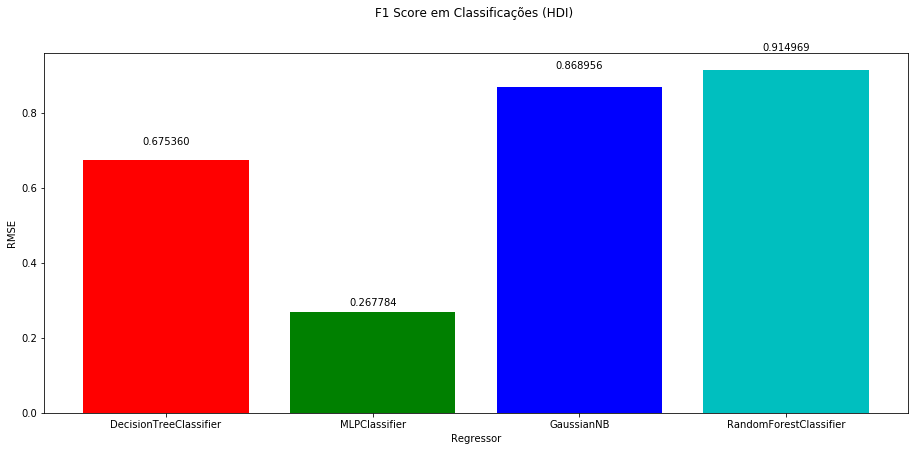

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('F1 Score em Classificações (HDI) \n\n')

rects = ax.bar(
        classifier_f1_score_data[:,0], 
        classifier_f1_score_data[:,1].astype(float), color='rgbc'
    )

plt.ylabel('RMSE')
plt.xlabel('Regressor')

autolabel(rects)

plt.show()

In [21]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = X
K = len(np.unique(y_labels)) + 1

kfold = KFold(K, True)

print('Best Classifier: ' + str(best_clf))
print('Cross-validation Score:')
print(cross_val_score(best_clf, X, y_labels, cv=kfold))

Best Classifier: RandomForestClassifier()
Cross-validation Score:
[0.97368421 0.92105263 0.94736842 0.89189189 0.83783784]
